In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [149]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3    age            99457 non-null  int64  
 4   category        99448 non-null  object 
 5   quantity        99457 non-null  int64  
 6   Price           99442 non-null  float64
 7   payment_method  99448 non-null  object 
 8   invoice_date    99448 non-null  object 
 9   shopping_mall   99439 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [153]:
df.rename(columns={
    ' age ':'age',
    'invoice_date': 'datetime',
    'Price': 'total_price'
}, inplace=True)

In [155]:
df = df.rename(columns=str.lower)

In [157]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='raise', format='mixed')

In [158]:
df.sort_values(by=['datetime', 'invoice_no'], inplace=True)

In [159]:
df['category'] = df['category'].replace({
    'Book':'Books',
    'bok': 'Books',
    'Clothin': 'Clothing',
    'Shoe': 'Shoes',
    'Technologi': 'Technology',
    'Toy': 'Toys'
})

In [160]:
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder

In [161]:
pipeline = Pipeline([
    ('category_col', CategoricalImputer(imputation_method='frequent',
                                       variables=['category', 'shopping_mall'])),
    ('other_variables', CategoricalImputer(imputation_method='missing',
                                           fill_value='Missing', variables=['payment_method']))
])

df_cat_otr = pipeline.fit_transform(df)
df_cat_otr.head()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall
4708,I100473,C607315,Female,51,Books,5,75.75,Debit Card,2021-01-01,Mall of Istanbul
96358,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,2021-01-01,Kanyon
21454,I104292,C431059,Female,22,Clothing,5,1500.40,Debit Card,2021-01-01,Emaar Square Mall
88635,I113208,C905558,Female,56,Technology,2,2100.00,Cash,2021-01-01,Forum Istanbul
82885,I114774,C913265,Male,30,Souvenir,1,11.73,Cash,2021-01-01,Metropol AVM


In [162]:
df_cat_otr['datetime'] = df_cat_otr['datetime'].fillna(method='ffill')

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_23006/1135604725.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat_otr['datetime'] = df_cat_otr['datetime'].fillna(method='ffill')


In [163]:
df_cat_otr = df_cat_otr.drop(labels=['invoice_no','customer_id'], axis=1)
df_cat_otr

,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall
4708,Female,51,Books,5,75.75,Debit Card,2021-01-01,Mall of Istanbul
96358,Female,28,Toys,5,179.20,Debit Card,2021-01-01,Kanyon
21454,Female,22,Clothing,5,1500.40,Debit Card,2021-01-01,Emaar Square Mall
88635,Female,56,Technology,2,2100.00,Cash,2021-01-01,Forum Istanbul
82885,Male,30,Souvenir,1,11.73,Cash,2021-01-01,Metropol AVM
...,...,...,...,...,...,...,...,...
54571,Male,22,Food & Beverage,1,5.23,Cash,2023-12-02,Mall of Istanbul
5,Female,22,Books,5,75.75,Debit Card,2023-12-02,Forum Istanbul
69339,Female,65,Shoes,3,1800.51,Cash,2023-12-02,Cevahir AVM
69367,Male,25,Shoes,1,NaN,Credit Card,2023-12-02,Mall of Istanbul


In [171]:
df_rand = df_cat_otr.sample(n=10000, random_state=7)
df_rand

,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall
38089,Female,34,Clothing,5,1500.40,Credit Card,2021-06-11,Kanyon
22257,Male,18,Clothing,1,300.08,Credit Card,2023-10-02,Zorlu Center
44121,Female,42,Cosmetics,3,121.98,Cash,2022-07-17,Istinye Park
56536,Female,23,Food & Beverage,2,10.46,Debit Card,2022-04-16,Metrocity
3146,Male,65,Books,2,30.30,Credit Card,2022-10-27,Cevahir AVM
...,...,...,...,...,...,...,...,...
95394,Male,57,Toys,3,107.52,Credit Card,2022-04-20,Cevahir AVM
45024,Male,62,Cosmetics,2,81.32,Credit Card,2021-09-23,Metropol AVM
47714,Female,21,Cosmetics,3,121.98,Cash,2022-05-04,Istinye Park
35086,Male,52,Clothing,3,900.24,Credit Card,2021-09-27,Emaar Square Mall


In [173]:
df_rand.to_csv('shopping_samp.csv', index=False)
df_rand.shape

(10000, 8)

In [215]:
df_rand = pd.read_csv('shopping_samp.csv')
df_rand

,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall
0,Female,34,Clothing,5,1500.40,Credit Card,2021-06-11,Kanyon
1,Male,18,Clothing,1,300.08,Credit Card,2023-10-02,Zorlu Center
2,Female,42,Cosmetics,3,121.98,Cash,2022-07-17,Istinye Park
3,Female,23,Food & Beverage,2,10.46,Debit Card,2022-04-16,Metrocity
4,Male,65,Books,2,30.30,Credit Card,2022-10-27,Cevahir AVM
...,...,...,...,...,...,...,...,...
9995,Male,57,Toys,3,107.52,Credit Card,2022-04-20,Cevahir AVM
9996,Male,62,Cosmetics,2,81.32,Credit Card,2021-09-23,Metropol AVM
9997,Female,21,Cosmetics,3,121.98,Cash,2022-05-04,Istinye Park
9998,Male,52,Clothing,3,900.24,Credit Card,2021-09-27,Emaar Square Mall


In [217]:
# To create a column of 'unit_price' by dividing total_price with quantity

x = []

for i in range(len(df_rand['total_price'])):
    x.append(df_rand['total_price'].iloc[i]/df_rand['quantity'].iloc[i])
df_rand['unit_price'] = x

In [219]:
df_rand = df_rand.sort_values(by='datetime').reset_index()
df_rand.head()

,index,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall,unit_price
0,9331,Female,44,Shoes,4,2400.68,Cash,2021-01-01,Metrocity,600.17
1,7743,Male,43,Clothing,4,1200.32,Credit Card,2021-01-01,Zorlu Center,300.08
2,4695,Female,45,Clothing,2,600.16,Cash,2021-01-01,Metrocity,300.08
3,2862,Female,47,Books,3,45.45,Credit Card,2021-01-01,Metrocity,15.15
4,6870,Male,51,Cosmetics,2,81.32,Cash,2021-01-01,Istinye Park,40.66


In [221]:
df_rand.drop(labels='index', axis=1, inplace=True)
df_rand.head()

,gender,age,category,quantity,total_price,payment_method,datetime,shopping_mall,unit_price
0,Female,44,Shoes,4,2400.68,Cash,2021-01-01,Metrocity,600.17
1,Male,43,Clothing,4,1200.32,Credit Card,2021-01-01,Zorlu Center,300.08
2,Female,45,Clothing,2,600.16,Cash,2021-01-01,Metrocity,300.08
3,Female,47,Books,3,45.45,Credit Card,2021-01-01,Metrocity,15.15
4,Male,51,Cosmetics,2,81.32,Cash,2021-01-01,Istinye Park,40.66


In [223]:
df_rand['datetime'] = pd.to_datetime(df_rand['datetime'])

In [225]:
df_rand['year'] = df_rand['datetime'].dt.year

In [227]:
df_rand['month'] = df_rand['datetime'].dt.month

In [229]:
# Re-arranging columns

df_rand = df_rand[['datetime', 'year','month', 'shopping_mall', 'gender', 'age', 'category', 'quantity', 'unit_price', 'total_price', 'payment_method']]
df_rand.head()

,datetime,year,month,shopping_mall,gender,age,category,quantity,unit_price,total_price,payment_method
0,2021-01-01,2021,1,Metrocity,Female,44,Shoes,4,600.17,2400.68,Cash
1,2021-01-01,2021,1,Zorlu Center,Male,43,Clothing,4,300.08,1200.32,Credit Card
2,2021-01-01,2021,1,Metrocity,Female,45,Clothing,2,300.08,600.16,Cash
3,2021-01-01,2021,1,Metrocity,Female,47,Books,3,15.15,45.45,Credit Card
4,2021-01-01,2021,1,Istinye Park,Male,51,Cosmetics,2,40.66,81.32,Cash


In [233]:
# Using function to populate null value by calculating other two columns

def miss_tot_price(df_rand):
    for idx, val in df_rand['total_price'].items():
        if val == np.nan:
            df_rand.loc[idx, 'total_price'] = df_rand.loc[idx, 'quantity'] * df_rand.loc[idx, 'unit_price']
    return df_rand['total_price']

def miss_uprice(df_rand):
    for idx, val in df_rand['unit_price'].items():
        if val == np.nan:
            df_rand.loc[idx, 'unit_price'] = df_rand.loc[idx, 'total_price'] / df_rand.loc[idx, 'quantity']
    return df_rand['unit_price']

df_rand['total_price'] = miss_tot_price(df_rand)
df_rand['unit_price'] = miss_uprice(df_rand)
df_rand.head()

,datetime,year,month,shopping_mall,gender,age,category,quantity,unit_price,total_price,payment_method
0,2021-01-01,2021,1,Metrocity,Female,44,Shoes,4,600.17,2400.68,Cash
1,2021-01-01,2021,1,Zorlu Center,Male,43,Clothing,4,300.08,1200.32,Credit Card
2,2021-01-01,2021,1,Metrocity,Female,45,Clothing,2,300.08,600.16,Cash
3,2021-01-01,2021,1,Metrocity,Female,47,Books,3,15.15,45.45,Credit Card
4,2021-01-01,2021,1,Istinye Park,Male,51,Cosmetics,2,40.66,81.32,Cash


In [69]:
pipeline = Pipeline([
    ('gender_ord_enc', OrdinalEncoder(encoding_method='arbitrary', 
                                      variables='gender')),
    ('cat_encode', RareLabelEncoder(tol=0.1, 
                                  n_categories=3, 
                                  variables='category'))
])

gendcat_ord_enc_ord_enc = pipeline.fit_transform(df_rand)
print(pipeline['gender_ord_enc'].encoder_dict_)
print(pipeline['cat_encode'].encoder_dict_)
gendcat_ord_enc_ord_enc.head()

{'gender': {'Female': 0, 'Male': 1}}
{'category': ['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes']}


,datetime,year,month,shopping_mall,gender,age,category,quantity,unit_price,total_price,payment_method
0,2021-01-01,2021,1,Metrocity,0,44,Shoes,4,600.17,60.60,Cash
1,2021-01-01,2021,1,Zorlu Center,1,43,Clothing,4,300.08,15.15,Credit Card
2,2021-01-01,2021,1,Metrocity,0,45,Clothing,2,300.08,30.30,Cash
3,2021-01-01,2021,1,Metrocity,0,47,Rare,3,15.15,75.75,Credit Card
4,2021-01-01,2021,1,Istinye Park,1,51,Cosmetics,2,40.66,75.75,Cash


In [71]:
for col in gendcat_ord_enc_ord_enc['category']:
    print(gendcat_ord_enc_ord_enc['category'].value_counts(normalize=True))
    break

category
Clothing           0.3537
Rare               0.1509
Cosmetics          0.1492
Food & Beverage    0.1431
Toys               0.1030
Shoes              0.1001
Name: proportion, dtype: float64


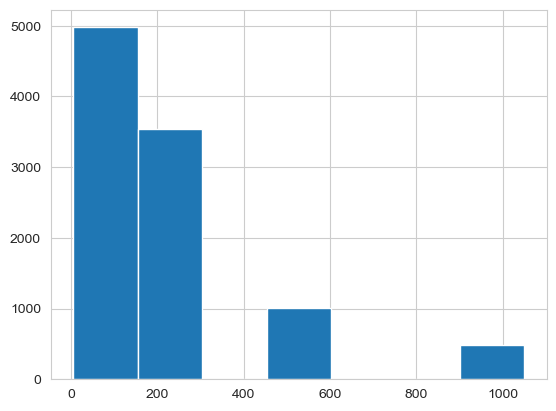

In [101]:
plt.hist(data=gendcat_ord_enc_ord_enc, x= 'unit_price', bins=7)
plt.show()